In [5]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import save_img, to_categorical
import cv2
import os
import shutil 
import pathlib

In [20]:
test_annotation = "../../../Data/IDRID/segmentation_ds/annotations/IDRiD_01/IDRiD_01_EX.tif"

In [21]:
cv2_img = cv2.imread(test_annotation)

In [44]:
img = array_to_img(cv2_img)

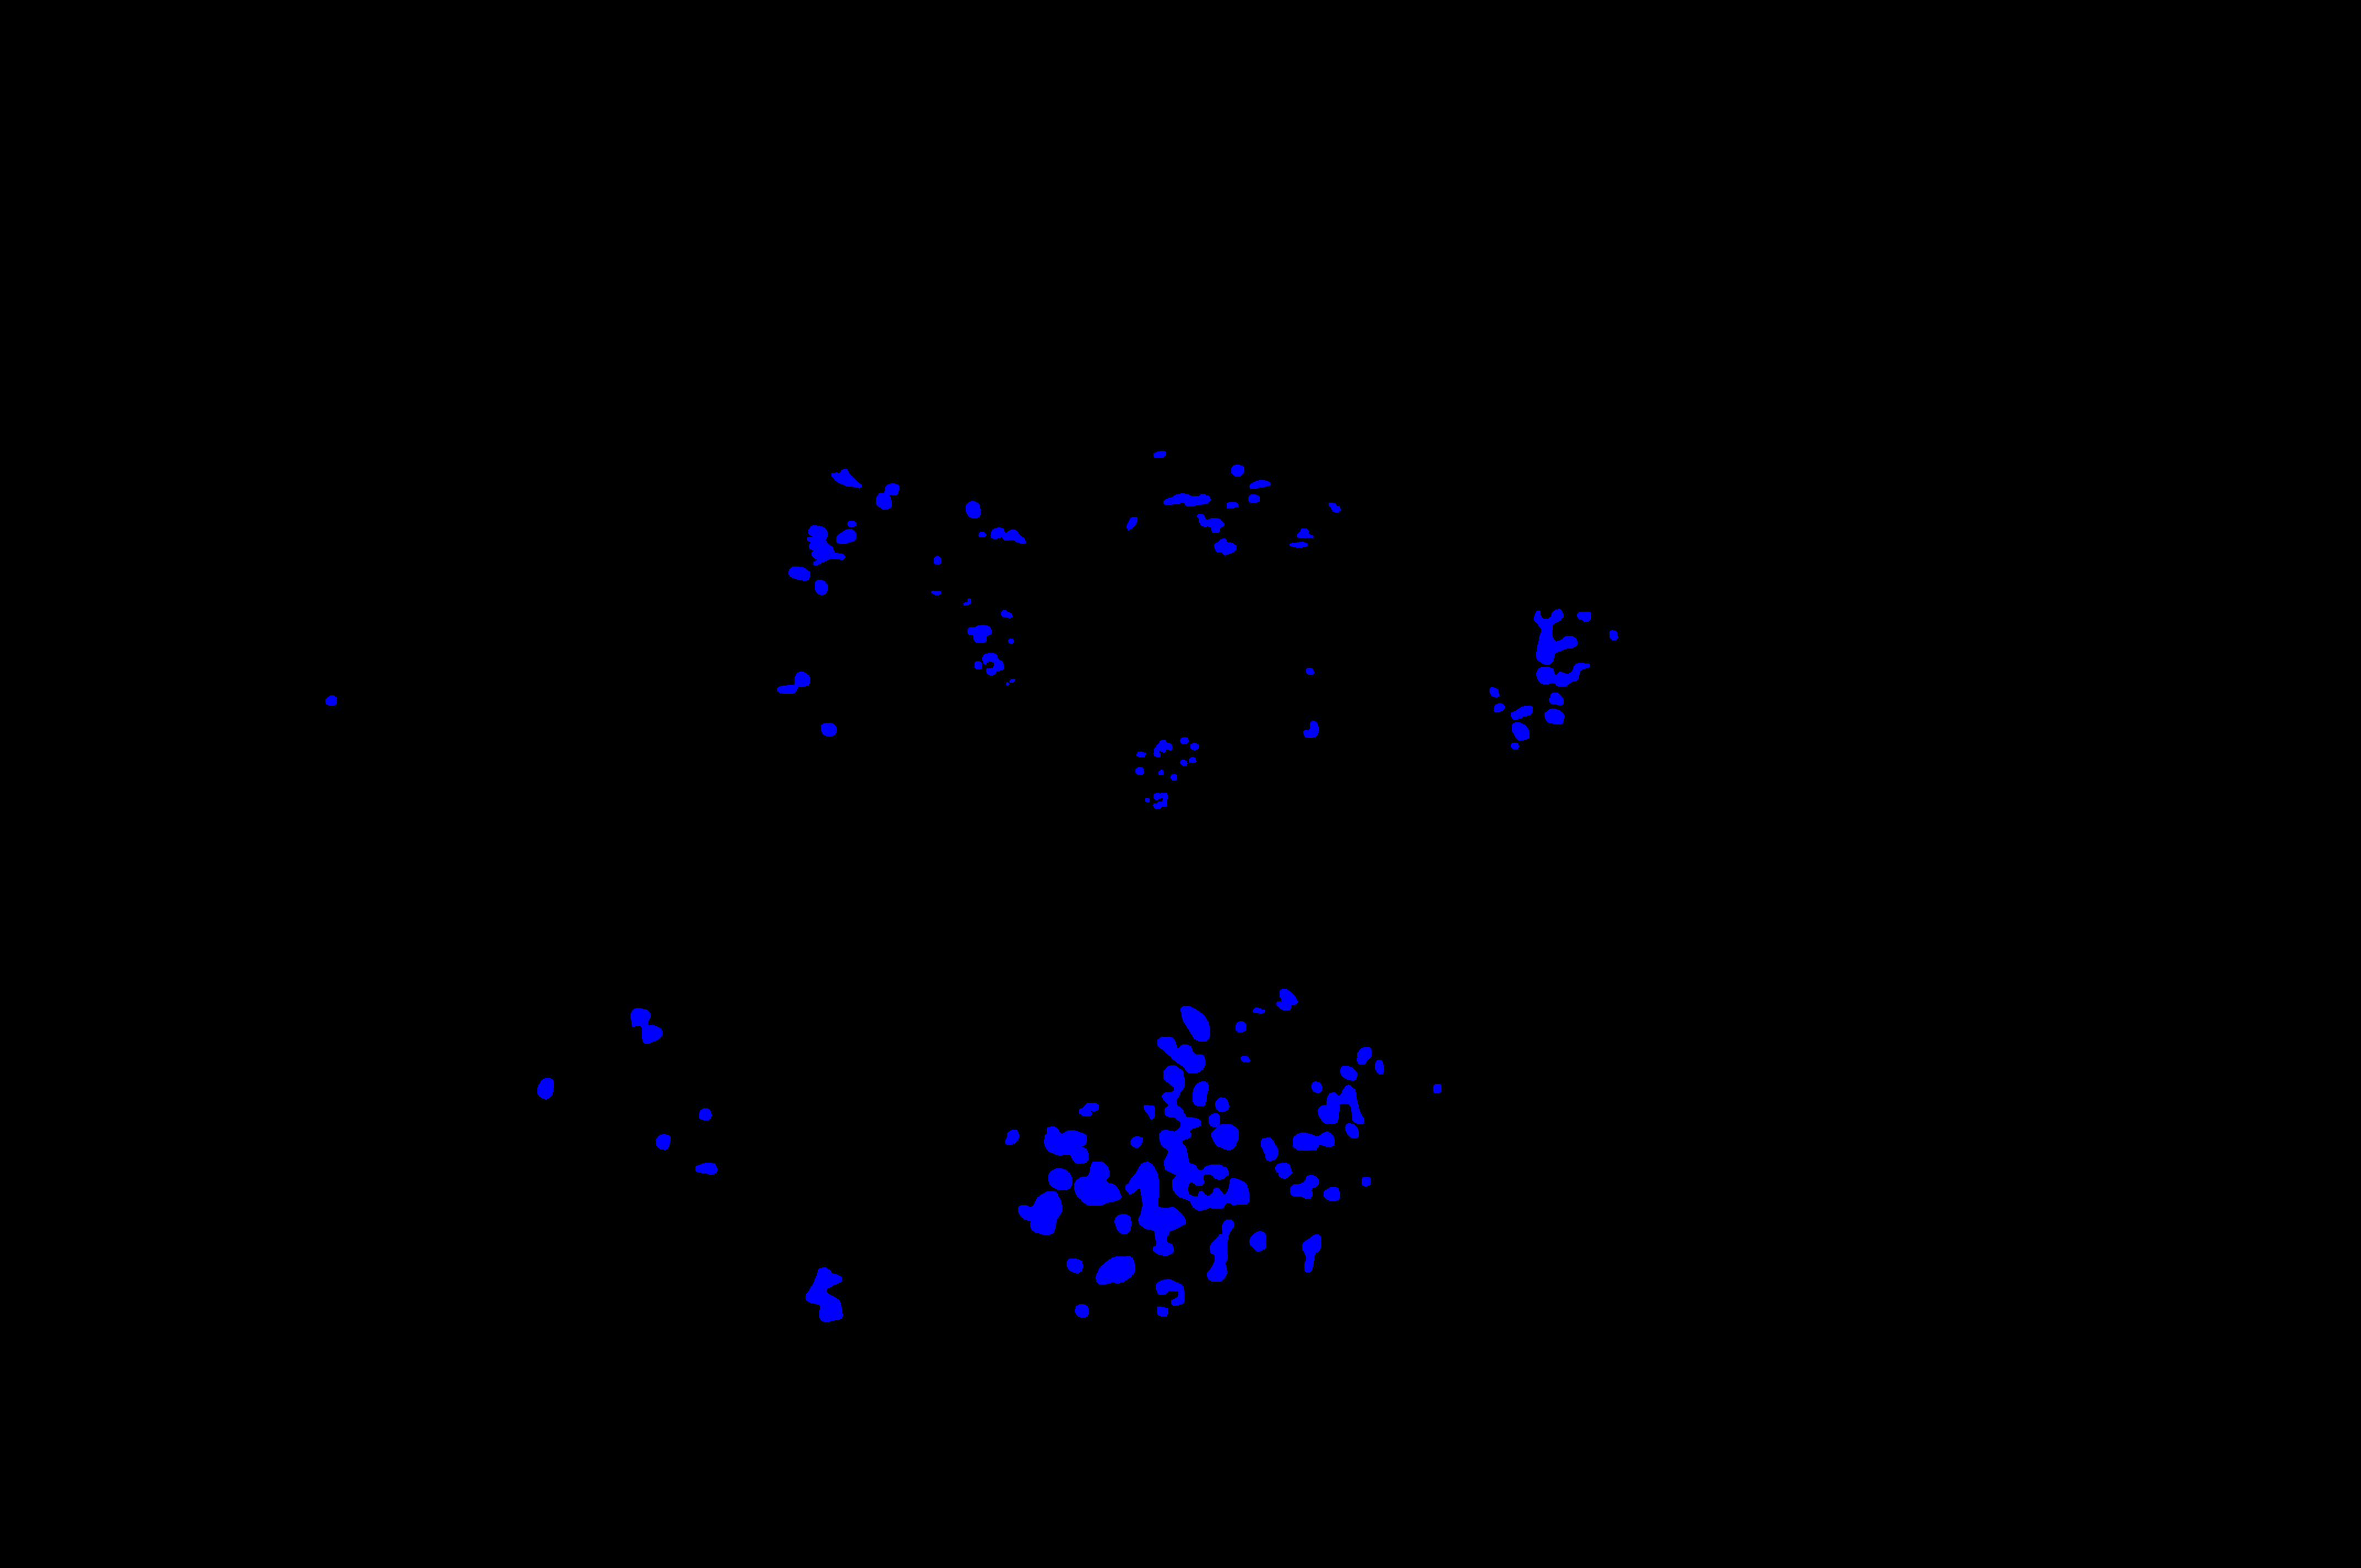

In [45]:
img

In [46]:
img_arr = img_to_array(img)

In [47]:
c = np.nonzero(img_arr)

In [48]:
c

(array([ 819,  819,  819, ..., 2400, 2400, 2400]),
 array([2106, 2107, 2108, ..., 1504, 1505, 1506]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [49]:
img_arr[c[0], c[1],:] = 255


In [50]:
img = array_to_img(img_arr)

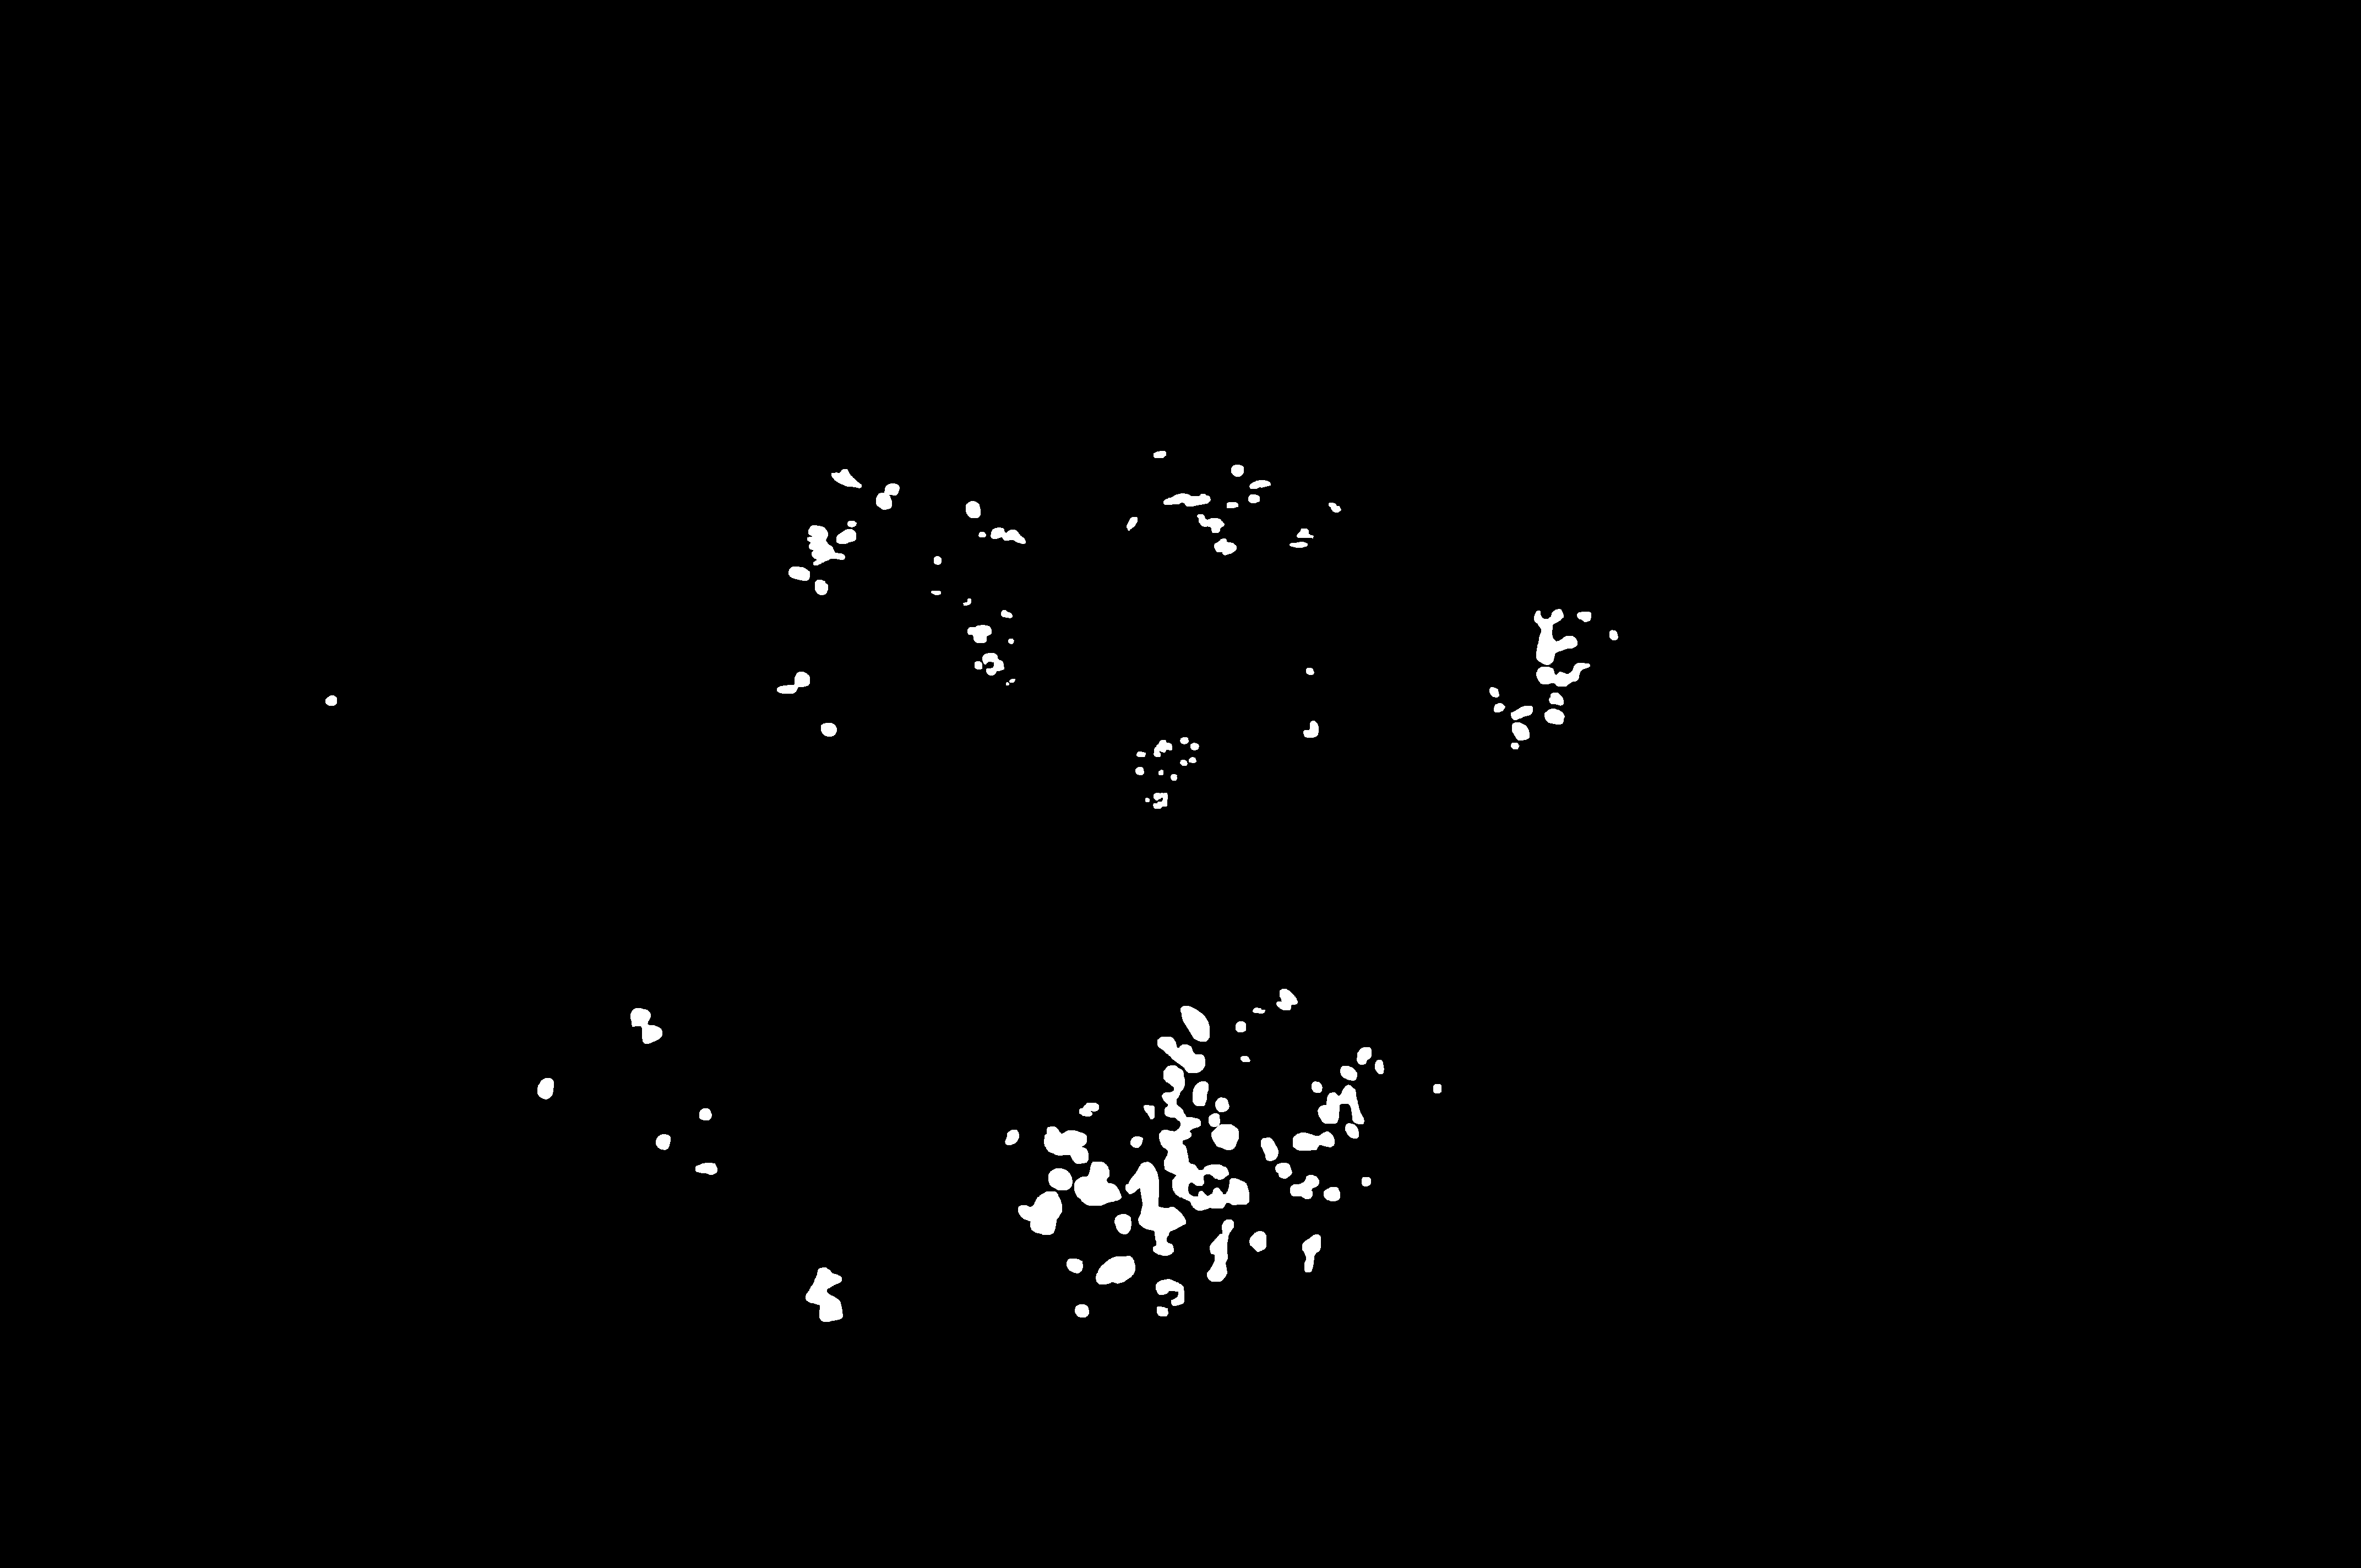

In [51]:
img

## Converting all the annotations to jpg files with white annotations

In [52]:
annotations_path = "../../../Data/IDRID/segmentation_ds/annotations"
new_annotations_path = "../../../Data/IDRID/segmentation_ds/annotations_png"

In [ ]:
for dp, dn, fn in os.walk(annotations_path):

    for f in fn:
        src_path = os.path.join(dp, f)
        
        img = cv2.imread(src_path)
        c = np.nonzero(img)
        

In [67]:
for dp, dn, fn in os.walk(annotations_path):
    new_dir = os.path.join(new_annotations_path, dp[-8:])
    os.mkdir(new_dir)
            

In [69]:
for dp, dn, fn in os.walk(annotations_path):

    for f in fn:

        src_path = os.path.join(dp, f)
        
        img = cv2.imread(src_path)
        c = np.nonzero(img)
        img[c[0], c[1],:] = 255

        img = array_to_img(img)
        new_extension = f[:-4] + ".png"
        dest_path = os.path.join(new_annotations_path, dp[-8:], new_extension)
        save_img(dest_path, img, data_format="channels_last", scale=False)


        

## Color Transform for all images

In [88]:
def identify(fn):

    ihe = "HE"
    se = "SE"
    he = "EX"
    ma = "MA"

    lesion_indices = {ihe:0, se:1, he:2, ma:3}
    lesion_names = {0:ihe, 1:se, 2:he, 3:ma}

    try:
        i = lesion_indices[fn[:-4]]
    except KeyError:
        i = -1
    
    return i

def ret_color(i):


    ma = np.array([[245, 128, 128]])
    se = np.array([[128, 242, 128]])
    he = np.array([[245, 234, 133]])
    ihe = np.array([[133, 213, 245]])

    lesion_colors = {0:ihe, 1:se, 2:he, 3:ma}

    try:
        c = lesion_colors[i]
    except KeyError:
        c = -1
    
    return c

def color_for_file(fn):

    i = identify(fn)

    c = ret_color(i)

    return c

def color_change(fp, color):

    img = load_img(fp, target_size=(1024, 1024))
    arr = img_to_array(img)
    #Finding all the pixels which are white, these will be nonzero values
    c = np.nonzero(arr[:,:])
    #
    #repeat factor
    r = len(arr[c])
    #Creating color pixels for each pixel that was white
    color = np.repeat(color, r, axis=0)
    arr[c[0], c[1], :] = color
    n_img = array_to_img(arr)

    return n_img

    
def find_and_change(fn, fp):

    c = color_for_file(fn)
    if type(c) != int: 
        ni = color_change(fp, c)
    else:
        return -1
    return ni



In [80]:
test_path = "../../../Data/IDRID/segmentation_ds/annotations_png/IDRiD_03/IDRiD_03_EX.png"
code = test_path[-6:]

In [86]:
test_i = load_img(test_path, target_size=(1024, 1024))
test_i = img_to_array(test_i)

In [87]:
np.unique(test_i)

array([  0., 255.], dtype=float32)

In [81]:
n_test = find_and_change(code, test_path)

In [90]:
data_path = "../../../Data/IDRID/segmentation_ds/annotations_png/"
file_num = 0
for dp, dn, fn in os.walk(data_path):
    for f in fn:

        if "N" in f:
            continue

        fp = os.path.join(dp, f)
        ni = find_and_change(f[-6:], fp)

        if type(ni) is not int:
            new_fp = fp[:-4] + "_N.png"

            save_img(new_fp, ni, data_format="channels_last")
        print(f"Finised file : {file_num}")
        file_num += 1

Finised file : 0
Finised file : 1
Finised file : 2
Finised file : 3
Finised file : 4
Finised file : 5
Finised file : 6
Finised file : 7
Finised file : 8
Finised file : 9
Finised file : 10
Finised file : 11
Finised file : 12
Finised file : 13
Finised file : 14
Finised file : 15
Finised file : 16
Finised file : 17
Finised file : 18
Finised file : 19
Finised file : 20
Finised file : 21
Finised file : 22
Finised file : 23
Finised file : 24
Finised file : 25
Finised file : 26
Finised file : 27
Finised file : 28
Finised file : 29
Finised file : 30
Finised file : 31
Finised file : 32
Finised file : 33
Finised file : 34
Finised file : 35
Finised file : 36
Finised file : 37
Finised file : 38
Finised file : 39
Finised file : 40
Finised file : 41
Finised file : 42
Finised file : 43
Finised file : 44
Finised file : 45
Finised file : 46
Finised file : 47
Finised file : 48
Finised file : 49
Finised file : 50
Finised file : 51
Finised file : 52
Finised file : 53
Finised file : 54
Finised file : 55
Fi

## Combining Images

In [130]:
def extract_lesion_files(dir_path):

    '''This function takes a directory where there might be multiple lesion files, 
    and returns a list of (the full file path, the name of the file, and the color for the lesion) those
    lesion files which have been modified.
    '''
    ihe = "HE_N"
    se = "SE_N"
    he = "EX_N"
    ma = "MA_N"

    lesion_indices = {ihe:2, se:0, he:1, ma:3}
    lesion_names = {0:ihe, 1:se, 2:he, 3:ma}
    files = []
    # return [(os.path.join(dir_path, f), f) for f in os.listdir(dir_path) if "N" in f]
    for f in os.listdir(dir_path):
        try:
            code = f[-8:-4]
            lesion_indices[code]
            code_2 = f[-8:].replace("_N", "")
            c = color_for_file(code_2)
            files.append((os.path.join(dir_path,f), f, c))
        except:
            continue
    
    return files 

def sort_lesions(files):

    '''This function takes a list of filepaths, filenames, and colors and returns the list
    sorted by the order of importance of the lesion
    '''

    ihe = "HE_N"
    se = "SE_N"
    he = "EX_N"
    ma = "MA_N"

    lesion_indices = {ihe:2, se:0, he:1, ma:3}
    lesion_names = {0:ihe, 1:se, 2:he, 3:ma}

    sorted_paths = sorted(files, key=lambda x: lesion_indices[x[1][-8:-4]])

    return sorted_paths


In [137]:
s_files = extract_lesion_files("../../../Data/IDRID/segmentation_ds/annotations_png/IDRiD_03")

In [138]:
s_files = sort_lesions(s_files)

In [136]:
mask = np.zeros((1024, 1024, 3))

def check_overflow(a):
    return np.nonzero(a > 255)

def color_change(fp, color):

    img = load_img(fp)
    arr = img_to_array(img)
    #Finding all the pixels which are white, these will be nonzero values
    c = np.nonzero(arr[:,:])
    #
    #repeat factor
    r = len(arr[c])
    #Creating color pixels for each pixel that was white
    color = np.repeat(color, r, axis=0)
    arr[c[0], c[1], :] = color
    n_img = array_to_img(arr)

    return n_img

def replace_colors(c, arr, color):

    r = len(arr[c])
    #Creating color pixels for each pixel that was white
    color = np.repeat(color, r, axis=0)
    arr[c[0], c[1], :] = color

    return arr

def full_combine(files, img1):

    '''Given a list of files, this function combines the lesions into one segmentation map'''

    if len(files) == 0:
        return img1
    else:
        f = files.pop(0)
        fp = f[0]
        fc = f[2]

        img2 = load_img(fp)
        img2 = img_to_array(img2)
        img1 = img1 + img2
        response_c = check_overflow(img1)
        img1 = replace_colors(response_c, img1, fc)
        
        return full_combine(files, img1)
    

In [139]:
n_i = full_combine(s_files, mask)

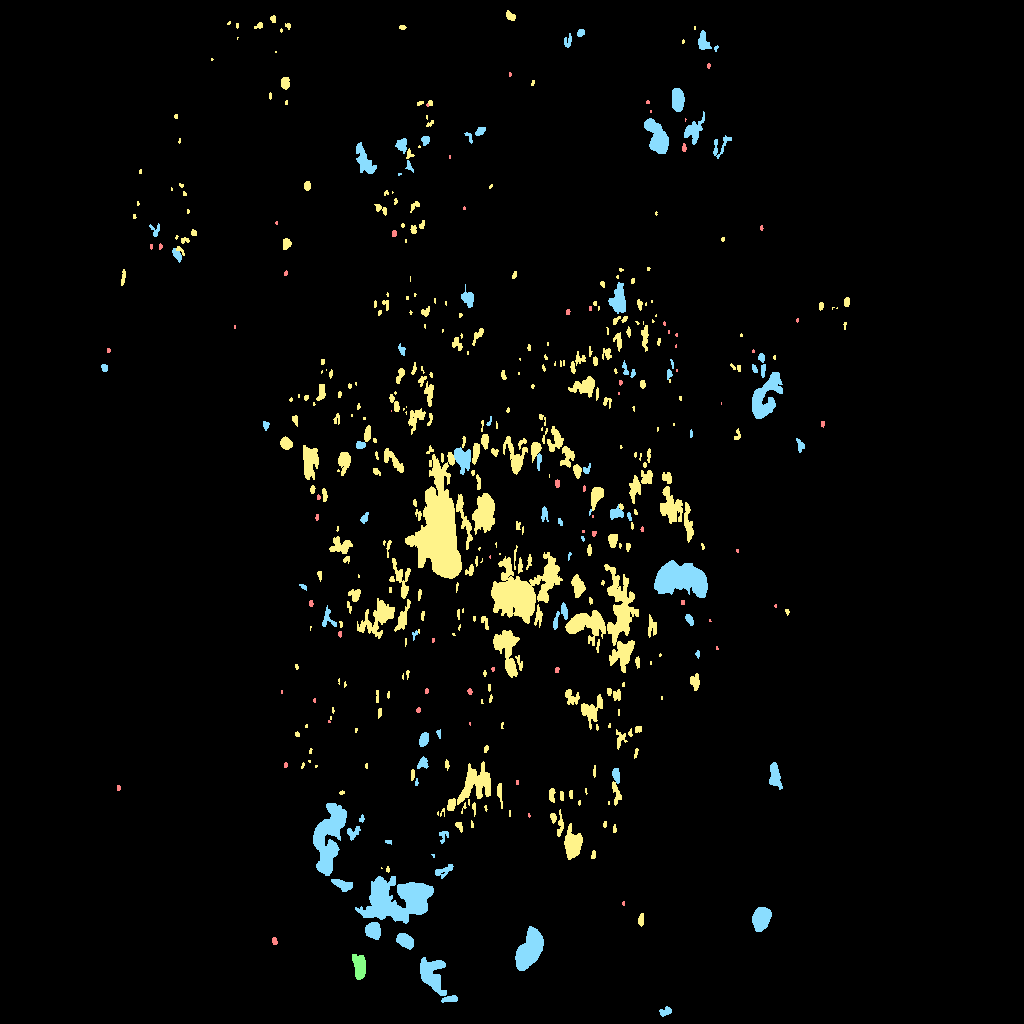

In [141]:
n_i = array_to_img(n_i)
n_i

In [144]:
"../../../Data/IDRID/segmentation_ds/annotations_png/IDRiD_03"[-8:]

'IDRiD_03'

In [158]:
i = 0
main_dir = "../../../Data/IDRID/segmentation_ds/annotations_png"
color_dir = "../../../Data/IDRID/segmentation_ds/color_annotations/"
mask = np.zeros((1024, 1024, 3))
for dn, dp, fn in os.walk(main_dir):
    if i == 0: 
        i += 1
        continue
    file_name = dn[-8:] + ".png"
    file_path = os.path.join(color_dir, file_name)
    #print(file_path)
    files = extract_lesion_files(dn)
    #print(files)
    sorted_files = sort_lesions(files)
    #print(sorted_files)
    img_arr = full_combine(sorted_files, mask)
    #img = array_to_img(img_arr)
    save_img(file_path, img_arr, data_format="channels_last")
    i += 1
    print(f"Processing image {i} next..")
    #break


Processing image 2 next..
Processing image 3 next..
Processing image 4 next..
Processing image 5 next..
Processing image 6 next..
Processing image 7 next..
Processing image 8 next..
Processing image 9 next..
Processing image 10 next..
Processing image 11 next..
Processing image 12 next..
Processing image 13 next..
Processing image 14 next..
Processing image 15 next..
Processing image 16 next..
Processing image 17 next..
Processing image 18 next..
Processing image 19 next..
Processing image 20 next..
Processing image 21 next..
Processing image 22 next..
Processing image 23 next..
Processing image 24 next..
Processing image 25 next..
Processing image 26 next..
Processing image 27 next..
Processing image 28 next..
Processing image 29 next..
Processing image 30 next..
Processing image 31 next..
Processing image 32 next..
Processing image 33 next..
Processing image 34 next..
Processing image 35 next..
Processing image 36 next..
Processing image 37 next..
Processing image 38 next..
Processin

## Making BW annotations

In [160]:
colors = [
    [255., 133., 133.], #ma
    [134., 255., 134.], #se
    [255., 243., 138.], #he
    [138., 221., 255.] #rh
]

label_colors = dict(zip(range(1, 5), colors))

In [163]:
bw_dir = "bw_annotations"
main_dir = "../../../Data/IDRID/segmentation_ds/"
bw_dir = os.path.join(main_dir, bw_dir)
os.mkdir(bw_dir)

In [164]:
i = 0
for dp, dn, fn in os.walk(color_dir):

    for f in fn:
        old_path = os.path.join(dp, f)
        img = load_img(old_path)
        img = img_to_array(img)
        for i in label_colors.keys():
            img[img == label_colors[i]] = i


        new_path = os.path.join(bw_dir, f)
        save_img(new_path, img, scale=False)

In [165]:
test_image = "../../../Data/IDRID/segmentation_ds/bw_annotations/IDRiD_01.png"

In [168]:
t_i = load_img(test_image)

In [169]:
t_i = img_to_array(t_i)

In [170]:
np.unique(t_i)

array([0., 1., 3., 4.], dtype=float32)